# PART 1: Cleaning and Preparing Data for Analysis:

### 🧾 Executive Summary

Most respondents are European full-time employees, with only 17% identifying as students. Job satisfaction and coding experience are both right-skewed, centered around levels 8 and 2.5 years, respectively. Satisfaction tends to rise with experience, showing a slight dip after about 35–40 years. Over 75% of full-time professionals hold a Bachelor’s or Master’s degree, while self-employed respondents demonstrate the greatest flexibility to work remotely—suggesting that large organizations still value in-person collaboration to sustain team performance.

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install matplotlib-venn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython import get_ipython
ipython = get_ipython()
if ipython is not None:
    ipython.history_manager.enabled = False

import os

os.chdir("/Users/dudugalbinski/Desktop/IBM Data Analyst/DA CAPSTONE/MY VERSION")
print("Current working directory:", os.getcwd())

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Current working director

In [5]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

try:
    # Load the dataset into a DataFrame
    df = pd.read_csv(file_path)
    
    # Display basic information about the dataset
    print("=" * 60)
    print("Dataset loaded successfully!")
    print("=" * 60)
    
    # Display the first few rows
    print("\nFirst 5 rows:")
    print(df.head())
    
    # Display dataset shape
    print(f"\nDataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
    
    # Display column names and data types
    print("\nColumn information:")
    print(df.dtypes)
    
    # Display basic statistics
    print("\nBasic statistics:")
    print(df.describe())
    
    # Check for missing values
    print("\nMissing values per column:")
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print(missing_values[missing_values > 0])
    else:
        print("No missing values found!")
    
except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
except pd.errors.ParserError as e:
    print(f"Error parsing the CSV file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully!

First 5 rows:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                             

In [6]:
# Handling Duplicates

print("=" * 60)
print("DUPLICATE REMOVAL PROCESS")
print("=" * 60)

# Check initial shape
print(f"\nOriginal dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

# Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    # Show some duplicate rows (optional)
    print("\nSample of duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))
    
    # Remove duplicates (keep first occurrence)
    df_clean = df.drop_duplicates(keep='first')
    
    print(f"\nAfter removing duplicates: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")
    print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")
    
    # Update the original DataFrame
    df = df_clean
    
else:
    print("\nNo duplicates found! Dataset is already clean.")

# Reset index after removing duplicates
df = df.reset_index(drop=True)

print("\n✓ Duplicate removal complete!")
print(f"Final dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

# Display first few rows of cleaned data
print("\nFirst 5 rows of cleaned data:")
print(df.head())

DUPLICATE REMOVAL PROCESS

Original dataset shape: 65437 rows, 114 columns
Number of duplicate rows: 0

No duplicates found! Dataset is already clean.

✓ Duplicate removal complete!
Final dataset shape: 65437 rows, 114 columns

First 5 rows of cleaned data:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \


Countries classified as 'Other':
['Nomadic' 'Swaziland' 'Dominica' 'Papua New Guinea' 'Guinea-Bissau'
 'Central African Republic' 'Equatorial Guinea' 'Guinea'
 'Micronesia, Federated States of...' nan 'Chad' 'Djibouti'
 'Solomon Islands']

Total missing countries: 13


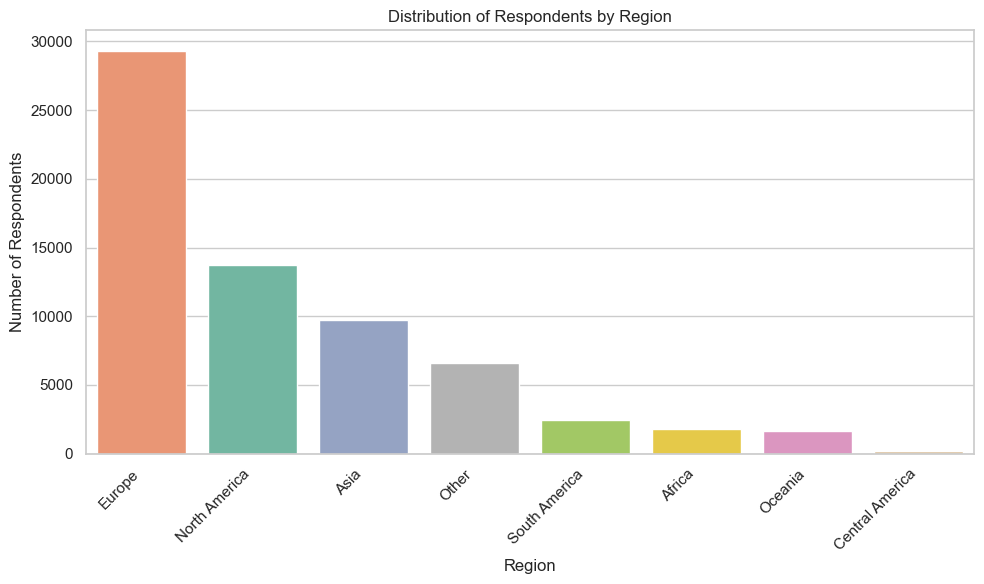

In [7]:
# Creating the "Region" column. This will help because we respondent from all over the world. 
# Analyzing by country will not always be the best way. Using "Regions" (continents) will allow for more insights. 
# Step 0: Assign countries to regions
# ------------------------------

country_to_region = {
    # North America
    'United States of America': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'Bahamas': 'North America', 'Jamaica': 'North America', 'Cuba': 'North America',
    'Dominican Republic': 'North America', 'Saint Kitts and Nevis': 'North America',
    'Antigua and Barbuda': 'North America', 'Barbados': 'North America', 'Trinidad and Tobago': 'North America',
    
    # Central America
    'Costa Rica': 'Central America', 'El Salvador': 'Central America', 'Guatemala': 'Central America',
    'Honduras': 'Central America', 'Nicaragua': 'Central America', 'Panama': 'Central America', 
    
    # South America
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America', 'Chile': 'South America',
    'Colombia': 'South America', 'Ecuador': 'South America', 'Guyana': 'South America', 'Paraguay': 'South America',
    'Peru': 'South America', 'Suriname': 'South America', 'Uruguay': 'South America',
    'Venezuela, Bolivarian Republic of...': 'South America',

    # Europe
    'Albania': 'Europe', 'Andorra': 'Europe', 'Armenia': 'Europe', 'Austria': 'Europe',
    'Belarus': 'Europe', 'Belgium': 'Europe', 'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe',
    'Croatia': 'Europe', 'Cyprus': 'Europe', 'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe',
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'Ireland': 'Europe', 'Italy': 'Europe', 'Kosovo': 'Europe', 'Latvia': 'Europe',
    'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Malta': 'Europe', 'Monaco': 'Europe',
    'Montenegro': 'Europe', 'Netherlands': 'Europe', 'North Macedonia': 'Europe',
    'Norway': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe', 'Russian Federation': 'Europe',
    'San Marino': 'Europe', 'Serbia': 'Europe', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 'Spain': 'Europe',
    'Sweden': 'Europe', 'Switzerland': 'Europe',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',

    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa', 'Burkina Faso': 'Africa',
    'Burundi': 'Africa', "Côte d'Ivoire": 'Africa', 'Cameroon': 'Africa', 'Cape Verde': 'Africa',
    'Democratic Republic of the Congo': 'Africa', 'Congo, Republic of the...': 'Africa', 'Egypt': 'Africa',
    'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Ghana': 'Africa', 'Kenya': 'Africa', 'Lesotho': 'Africa',
    'Liberia': 'Africa', 'Libyan Arab Jamahiriya': 'Africa', 'Madagascar': 'Africa', 'Malawi': 'Africa',
    'Mali': 'Africa', 'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Morocco': 'Africa', 'Mozambique': 'Africa',
    'Namibia': 'Africa', 'Niger': 'Africa', 'Nigeria': 'Africa', 'Rwanda': 'Africa', 'Senegal': 'Africa',
    'Sierra Leone': 'Africa', 'Somalia': 'Africa', 'South Africa': 'Africa', 'Sudan': 'Africa', 'Togo': 'Africa',
    'Tunisia': 'Africa', 'Uganda': 'Africa', 'United Republic of Tanzania': 'Africa', 'Zambia': 'Africa',
    'Zimbabwe': 'Africa',

    # Asia
    'Afghanistan': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia', 'Bangladesh': 'Asia', 'Bhutan': 'Asia', 'Brunei Darussalam': 'Asia',
    'Cambodia': 'Asia', 'China': 'Asia', 'Hong Kong (S.A.R.)': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia',
    'Iran, Islamic Republic of...': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia', 'Japan': 'Asia', 'Jordan': 'Asia',
    'Kazakhstan': 'Asia', 'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', "Lao People's Democratic Republic": 'Asia',
    'Lebanon': 'Asia', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mongolia': 'Asia', 'Myanmar': 'Asia', 'Nepal': 'Asia',
    'North Korea': 'Asia', 'Oman': 'Asia', 'Pakistan': 'Asia', 'Palestine': 'Asia', 'Philippines': 'Asia',
    'Qatar': 'Asia', 'Republic of Korea': 'Asia', 'Saudi Arabia': 'Asia', 'Singapore': 'Asia', 'Sri Lanka': 'Asia',
    'Syrian Arab Republic': 'Asia', 'Taiwan': 'Asia', 'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Turkmenistan': 'Asia',
    'United Arab Emirates': 'Asia', 'Uzbekistan': 'Asia', 'Viet Nam': 'Asia', 'Yemen': 'Asia',

    # Oceania
    'Australia': 'Oceania', 'Fiji': 'Oceania', 'New Zealand': 'Oceania', 'Nauru': 'Oceania', 'Samoa': 'Oceania'
}

country_to_region.update({
    'Ukraine': 'Europe',
    'Turkey': 'Europe',
    'Republic of North Macedonia': 'Europe',
    'Georgia': 'Europe',
    'Isle of Man': 'Europe',
    'South Korea': 'Asia',
    "Democratic People's Republic of Korea": 'Asia',
    'Republic of Moldova': 'Europe',
    'Belize': 'Central America',
    'Haiti': 'North America'
})


# Assign regions
df['Region'] = df['Country'].map(country_to_region)

# Assign 'Other' to countries not in the 7 main regions
valid_regions = ['North America', 'Central America', 'South America', 'Africa', 'Europe', 'Asia', 'Oceania']
df['Region'] = df['Region'].apply(lambda x: x if x in valid_regions else 'Other')

missing_countries = df.loc[df['Region'] == 'Other', 'Country'].unique()
print("Countries classified as 'Other':")
print(missing_countries)
print(f"\nTotal missing countries: {len(missing_countries)}")


# Visualize the distribution in Regions
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='Region',
    hue='Region',  
    order=df['Region'].value_counts().index,
    palette='Set2'
)

plt.title('Distribution of Respondents by Region')
plt.xlabel('Region')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Outliers and missing values might be addressed later depending on the specific analysis being performed.

The Employment column has 58 unique values, which makes it very different to visualize and extract insights. To address that I will map the responses into 13 different categories:

In [8]:
# Step 1: Explore the unique values in Employment column
print("=" * 60)
print("EMPLOYMENT COLUMN ANALYSIS")
print("=" * 60)

print(f"\nTotal responses: {len(df)}")
print(f"Unique employment values: {df['Employment'].nunique()}")
print("\nValue counts:")
print(df['Employment'].value_counts())

EMPLOYMENT COLUMN ANALYSIS

Total responses: 65437
Unique employment values: 110

Value counts:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                 

In [9]:
# Step 2: Define categorization function
def categorize_employment(employment):
    """
    Categorize employment status into detailed categories
    """
    if pd.isna(employment):
        return 'Unknown'
    
    employment_lower = str(employment).lower().strip()
    
    # Check for key indicators
    is_student = 'student' in employment_lower
    is_self_employed = ('independent contractor' in employment_lower or 
                       'freelancer' in employment_lower or 
                       'self-employed' in employment_lower)
    is_full_time_employed = 'employed, full-time' in employment_lower or 'full-time employed' in employment_lower
    is_part_time_employed = 'employed, part-time' in employment_lower or 'part-time employed' in employment_lower
    is_employed = is_full_time_employed or is_part_time_employed or ('employed' in employment_lower and not 'not employed' in employment_lower)
    is_not_employed = 'not employed' in employment_lower
    is_full_time_student = 'full-time' in employment_lower and 'student' in employment_lower
    is_part_time_student = 'part-time' in employment_lower and 'student' in employment_lower
    
    # Not Employed (takes priority UNLESS the person is a student or self-employed)
    if is_not_employed and not is_student and not is_self_employed:
        return 'Not Employed'

    # Self-Employed + Student Combinations
    if is_self_employed and is_student:
        return 'Self-Employed + Student'
    
    # Self-Employed + Employed Combinations
    elif is_self_employed and is_employed:
        return 'Self-Employed + Employed'
    
    # Self-Employed only
    elif is_self_employed:
        return 'Self-Employed'
    
    # Student + Employment Combinations (traditional employment, not self-employed)
    elif is_full_time_student and is_full_time_employed:
        return 'Student Full-Time + Employed Full-Time'
    elif is_full_time_student and is_part_time_employed:
        return 'Student Full-Time + Employed Part-Time'
    elif is_part_time_student and is_full_time_employed:
        return 'Student Part-Time + Employed Full-Time'
    elif is_part_time_student and is_part_time_employed:
        return 'Student Part-Time + Employed Part-Time'
    
    # Student + Employed (unspecified type)
    elif is_student and is_employed:
        return 'Student + Employed'
    
    # Student only (no employment mentioned OR student + not employed)
    elif is_full_time_student:
        return 'Student Full-Time'
    elif is_part_time_student:
        return 'Student Part-Time'
    elif is_student:
        return 'Student'
    
    # Employment only (no student, no self-employed)
    elif is_full_time_employed:
        return 'Employed Full-Time'
    elif is_part_time_employed:
        return 'Employed Part-Time'
    elif 'employed' in employment_lower:
        return 'Employed'
    
    # Retired
    elif 'retired' in employment_lower:
        return 'Retired'
    
    # Other
    else:
        return 'Other'

# Step 3: Create new categorized column
df['EmploymentCategory'] = df['Employment'].apply(categorize_employment)

# Step 4: Display results
print("\n" + "=" * 60)
print("CATEGORIZATION RESULTS")
print("=" * 60)

print("\nNew category distribution:")
category_counts = df['EmploymentCategory'].value_counts()
print(category_counts)

print("\nPercentage distribution:")
category_pct = df['EmploymentCategory'].value_counts(normalize=True) * 100
print(category_pct.round(2))

# Step 5: Show mapping examples - grouped by category
print("\n" + "=" * 60)
print("SAMPLE MAPPINGS BY CATEGORY")
print("=" * 60)

for category in sorted(df['EmploymentCategory'].unique()):
    sample = df[df['EmploymentCategory'] == category]['Employment'].unique()
    print(f"\n{category}:")
    for val in sample[:3]:  # Show first 3 examples
        print(f"  - {val}")

# Step 6: Check for any unmapped values in 'Other'
if 'Other' in df['EmploymentCategory'].values:
    print("\n" + "=" * 60)
    print("VALUES CATEGORIZED AS 'OTHER' (review if needed)")
    print("=" * 60)
    other_values = df[df['EmploymentCategory'] == 'Other']['Employment'].unique()
    for val in other_values[:10]:  # Show first 10
        print(f"  - {val}")

print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"✓ Categorization complete!")
print(f"Reduced from {df['Employment'].nunique()} unique values to {df['EmploymentCategory'].nunique()} categories")
print(f"\nTotal categories: {df['EmploymentCategory'].nunique()}")
print(f"\nAll categories:")
for i, cat in enumerate(sorted(df['EmploymentCategory'].unique()), 1):
    count = (df['EmploymentCategory'] == cat).sum()
    print(f"  {i}. {cat} ({count} responses)")


CATEGORIZATION RESULTS

New category distribution:
EmploymentCategory
Employed Full-Time                        39266
Self-Employed + Employed                   9095
Student Full-Time                          5788
Not Employed                               3123
Student Full-Time + Employed Full-Time     1796
Employed Part-Time                         1274
Self-Employed + Student                    1165
Student Full-Time + Employed Part-Time     1132
Student Part-Time                           694
Student Part-Time + Employed Part-Time      567
Other                                       546
Retired                                     525
Self-Employed                               466
Name: count, dtype: int64

Percentage distribution:
EmploymentCategory
Employed Full-Time                        60.01
Self-Employed + Employed                  13.90
Student Full-Time                          8.85
Not Employed                               4.77
Student Full-Time + Employed Full-Time    

In [10]:
# Create 'Student' column: "Yes" if 'student' appears in EmploymentCategory, else "No"
df['Student'] = df['EmploymentCategory'].str.contains('student', case=False, na=False)
df['Student'] = df['Student'].apply(lambda x: 'Yes' if x else 'No')

# Verify the result
print(df['Student'].value_counts())
# Percentages
print("\nPercentages:")
print((df['Student'].value_counts(normalize=True) * 100).round(2))

Student
No     54295
Yes    11142
Name: count, dtype: int64

Percentages:
Student
No     82.97
Yes    17.03
Name: proportion, dtype: float64


In [11]:
# Create a copy and save the cleaned data
clean_df = df.copy()
# print(clean_df.head())
clean_df.to_csv("cleaned_survey_data.csv", index=False)
print("✅ Cleaned data saved as 'cleaned_survey_data.csv'")

✅ Cleaned data saved as 'cleaned_survey_data.csv'


Now we can start Exploratory Data Analysis
### -----------------------------------------------------------------------------------------------------
### -----------------------------------------------------------------------------------------------------

# PART 2: Analysing the Distribution and Correlation of Key Variables

## 🧾 Executive Summary

Most respondents are European full-time employees, with only 17% identifying as students. Job satisfaction and coding experience are both right-skewed, centered around levels 8 and 2.5 years, respectively. Satisfaction tends to rise with experience, showing a slight dip after about 35–40 years. Over 75% of full-time professionals hold a Bachelor’s or Master’s degree, while self-employed respondents demonstrate the greatest flexibility to work remotely—suggesting that large organizations still value in-person collaboration to sustain team performance.

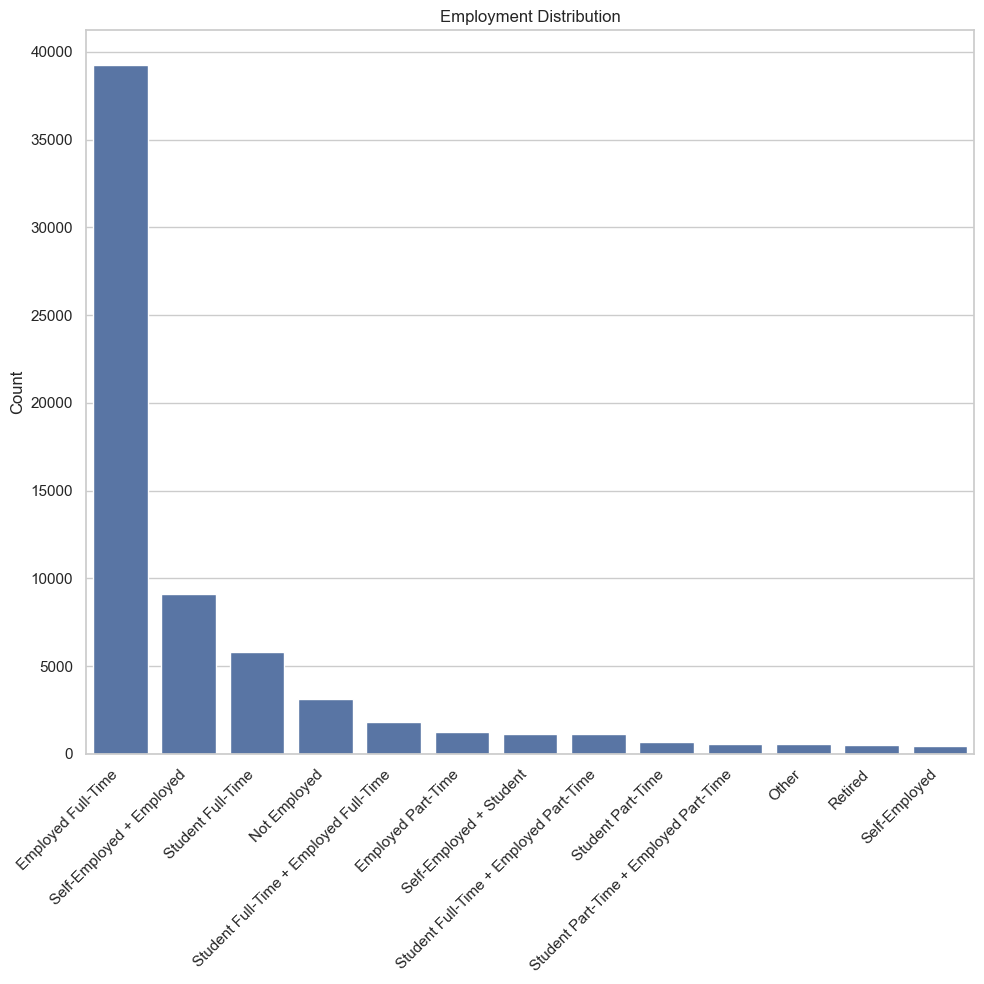

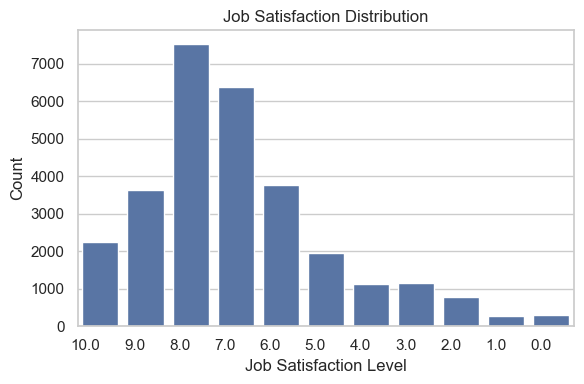

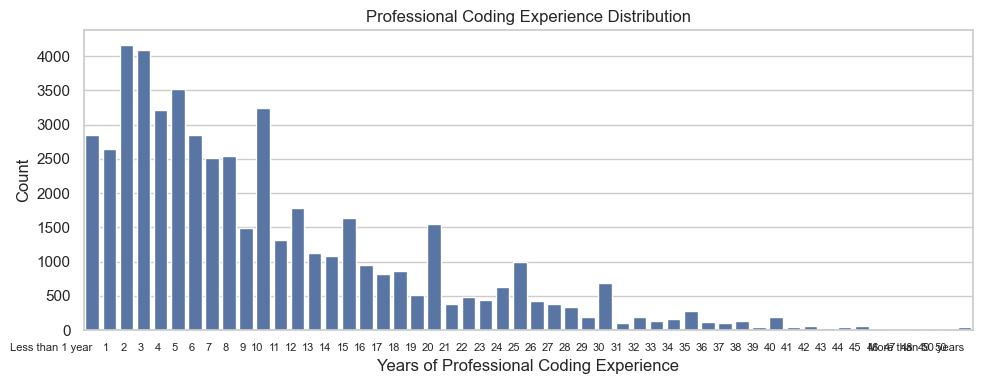

In [12]:
# 1) Employment Distribution
plt.figure(figsize=(10,10))
sns.countplot(
    x='EmploymentCategory',
    data=clean_df,
    order=clean_df['EmploymentCategory'].value_counts().index
)
plt.title("Employment Distribution")
plt.ylabel("Count")
plt.xlabel("")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2) Job Satisfaction Distribution
plt.figure(figsize=(6,4))
sns.countplot(
    x='JobSat',
    data=clean_df,
        order=sorted(clean_df['JobSat'].dropna().unique(), reverse=True)
)
plt.title("Job Satisfaction Distribution")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Count")
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

# 3) Years of Professional Coding Experience (sorted numerically)
# Convert special text values to numeric-friendly form for sorting
def yearscodepro_sort_key(x):
    x = str(x)
    x = x.replace('Less than 1 year', '0.5')
    x = x.replace('More than 50 years', '55')
    # check if it's numeric now
    if x.replace('.', '', 1).isdigit():
        return float(x)
    return 999  # push unknowns to the end

sorted_years = sorted(
    clean_df['YearsCodePro'].dropna().unique(),
    key=yearscodepro_sort_key
)

plt.figure(figsize=(10,4))
sns.countplot(
    x='YearsCodePro',
    data=clean_df,
    order=sorted_years
)
plt.title("Professional Coding Experience Distribution")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Count")

# ✅ Format x-axis labels: remove decimals, smaller font size
plt.xticks(
    ticks=range(len(sorted_years)),
    labels=[
        str(int(float(x))) if str(x).replace('.', '', 1).isdigit() else x
        for x in sorted_years
    ],
    rotation=0,
    ha='right',
    fontsize=8  # smaller font size for better readability
)

plt.tight_layout()
plt.show()


### Distribution of RemoteWork and EdLevel

📊 Remote Work Distribution
RemoteWork
Hybrid       23015
Remote       20831
In-person    10960
NaN          10631
Name: count, dtype: int64

Percentage (%):
RemoteWork
Hybrid       35.17
Remote       31.83
In-person    16.75
NaN          16.25
Name: proportion, dtype: float64


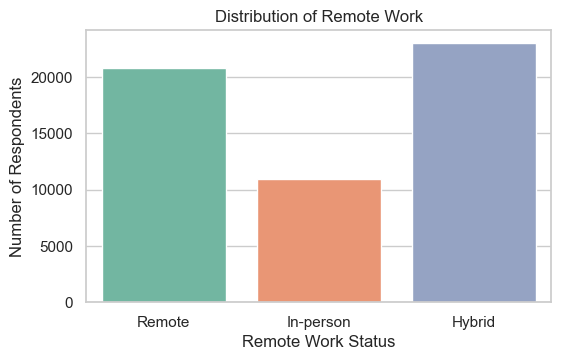


🎓 Education Level Distribution
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
NaN                                                                                    4653
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

Percentage (%):
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                     

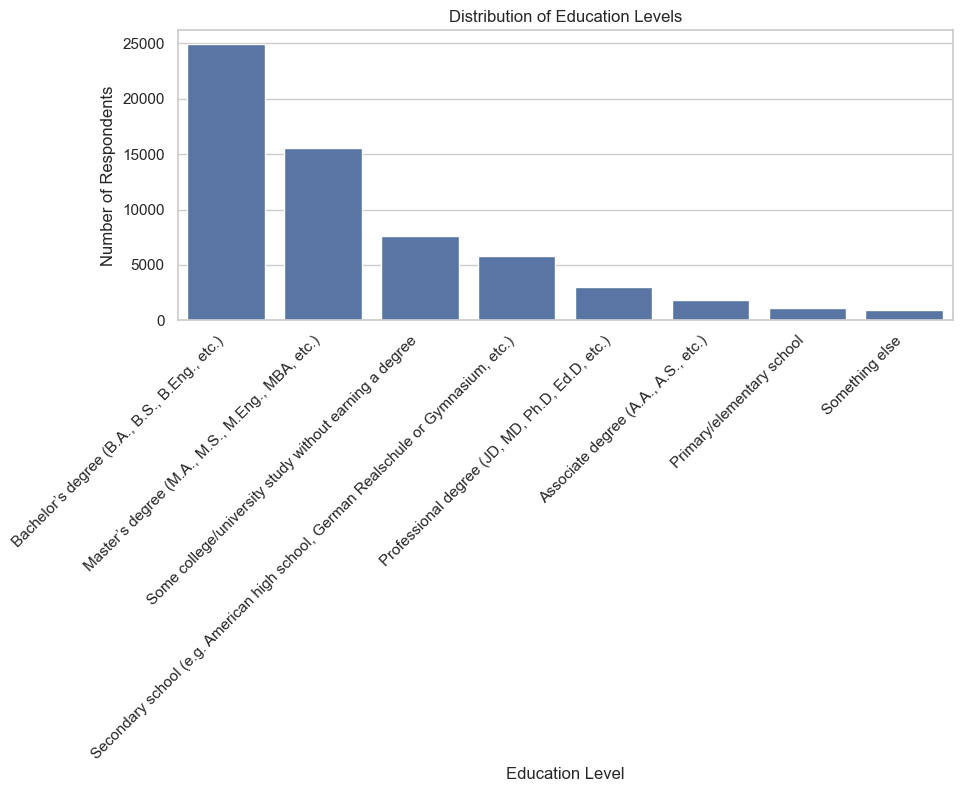

In [13]:
sns.set(style="whitegrid")

# --- 1) Clean RemoteWork labels ---
clean_df['RemoteWork'] = clean_df['RemoteWork'].replace(
    {'Hybrid (some remote, some in-person)': 'Hybrid'}
)

# --- 2) Distribution of RemoteWork ---
print("📊 Remote Work Distribution")
print(clean_df['RemoteWork'].value_counts(dropna=False))
print("\nPercentage (%):")
print((clean_df['RemoteWork'].value_counts(normalize=True, dropna=False) * 100).round(2))

plt.figure(figsize=(6,4))
sns.countplot(
    data=clean_df,
    x='RemoteWork',
    hue='RemoteWork',
    palette='Set2',
    legend=False
)
plt.title('Distribution of Remote Work')
plt.xlabel('Remote Work Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.subplots_adjust(bottom=0.2)  # prevents text clipping
plt.show()


# --- 3) Distribution of Education Level (EdLevel) ---
print("\n🎓 Education Level Distribution")
print(clean_df['EdLevel'].value_counts(dropna=False))
print("\nPercentage (%):")
print((clean_df['EdLevel'].value_counts(normalize=True, dropna=False) * 100).round(2))

plt.figure(figsize=(10,5))
sns.countplot(
    data=clean_df,
    x='EdLevel',
    order=clean_df['EdLevel'].value_counts().index,  # ✅ sorted descending
    legend=False
)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)  # gives extra space for long x labels
plt.show()


### How Years of Professional Coding Experience correlates to Job Satisfaction:

Median Job Satisfaction by Experience Range:
ExperienceRange
0-5      7.0
5-10     7.0
10-15    7.0
15-20    8.0
20-25    8.0
25-30    8.0
30-35    8.0
35-40    8.0
40-45    8.0
45+      8.0
Name: JobSat, dtype: float64

Mean Job Satisfaction by Experience Range:
ExperienceRange
0-5      6.674896
5-10     6.902872
10-15    7.038320
15-20    7.162134
20-25    7.192046
25-30    7.344715
30-35    7.338736
35-40    7.608974
40-45    7.539394
45+      7.404255
Name: JobSat, dtype: float64


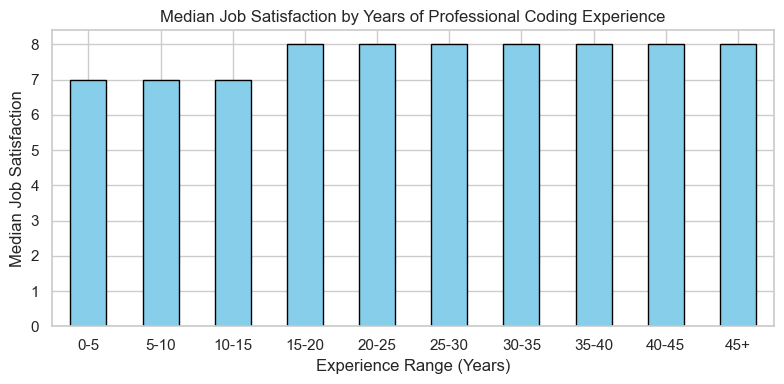

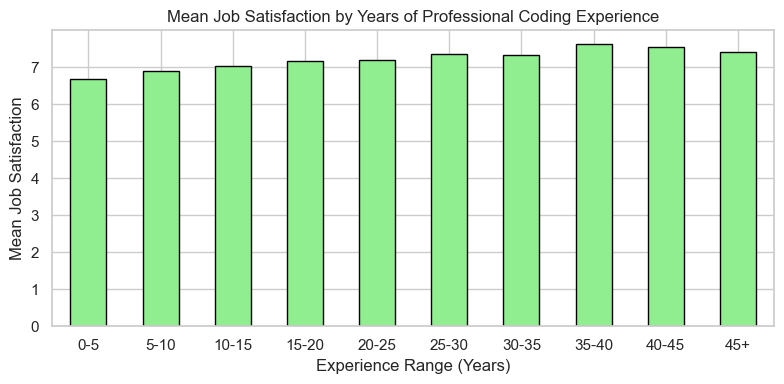

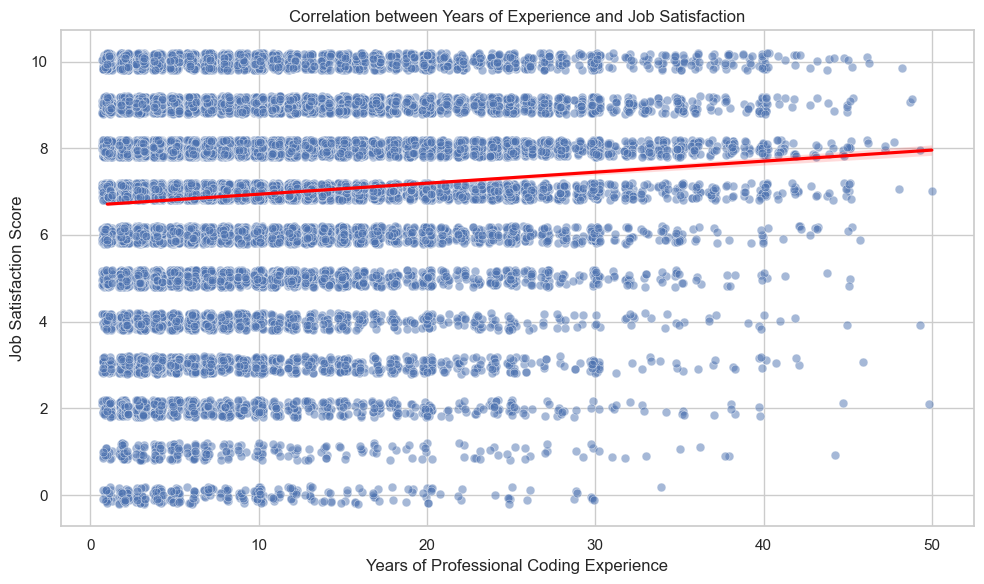

In [14]:
# 1) Convert YearsCodePro to numeric (non-numeric -> NaN)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 2) Drop rows where JobSat or YearsCodePro is missing
df_exp = df.dropna(subset=['YearsCodePro', 'JobSat']).copy()

# 3) Define bins dynamically to cover the max years
max_years = int(df_exp['YearsCodePro'].max()) + 1
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, max_years]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45+']

df_exp['ExperienceRange'] = pd.cut(
    df_exp['YearsCodePro'],
    bins=bins,
    labels=labels,
    right=False
)

# 4) Calculate MEDIAN job satisfaction per experience range
median_satisfaction = (
    df_exp.groupby('ExperienceRange', observed=False)['JobSat']
    .median()
)
print("Median Job Satisfaction by Experience Range:")
print(median_satisfaction)

# 5) Calculate MEAN job satisfaction per experience range
mean_satisfaction = (
    df_exp.groupby('ExperienceRange', observed=False)['JobSat']
    .mean()
)
print("\nMean Job Satisfaction by Experience Range:")
print(mean_satisfaction)

# 6) Plot MEDIAN satisfaction
plt.figure(figsize=(8,4))
median_satisfaction.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 7) Plot MEAN satisfaction
plt.figure(figsize=(8,4))
mean_satisfaction.plot(
    kind='bar',
    color='lightgreen',
    edgecolor='black'
)
plt.title('Mean Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Mean Job Satisfaction')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(10,6))

# Add small random noise ("jitter") to visualize overlapping points
x_jitter = df_exp['YearsCodePro'] + np.random.uniform(-0.3, 0.3, size=len(df_exp))
y_jitter = df_exp['JobSat'] + np.random.uniform(-0.2, 0.2, size=len(df_exp))

# Scatter plot with jittered data
sns.scatterplot(x=x_jitter, y=y_jitter, alpha=0.5, s=40)

# Add trend line (regression)
sns.regplot(
    x='YearsCodePro',
    y='JobSat',
    data=df_exp,
    scatter=False,
    color='red'
)

plt.title("Correlation between Years of Experience and Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction Score")
plt.tight_layout()
plt.show()

### How Education Level correlates to Employment:

In [15]:
# Crosstab: education level by employment category (in %)
edu_employment_ct = pd.crosstab(
    clean_df['EmploymentCategory'],
    clean_df['EdLevel'],
    normalize='index'
) * 100

print("✅ Crosstab created successfully!")
print(edu_employment_ct.head())

✅ Crosstab created successfully!
EdLevel             Associate degree (A.A., A.S., etc.)  \
EmploymentCategory                                        
Employed Full-Time                             2.907547   
Employed Part-Time                             3.376623   
Not Employed                                   3.061224   
Other                                          1.939655   
Retired                                        3.592814   

EdLevel             Bachelor’s degree (B.A., B.S., B.Eng., etc.)  \
EmploymentCategory                                                 
Employed Full-Time                                     46.003485   
Employed Part-Time                                     34.805195   
Not Employed                                           41.836735   
Other                                                  20.689655   
Retired                                                31.536926   

EdLevel             Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  \
Emplo

<Figure size 1200x600 with 0 Axes>

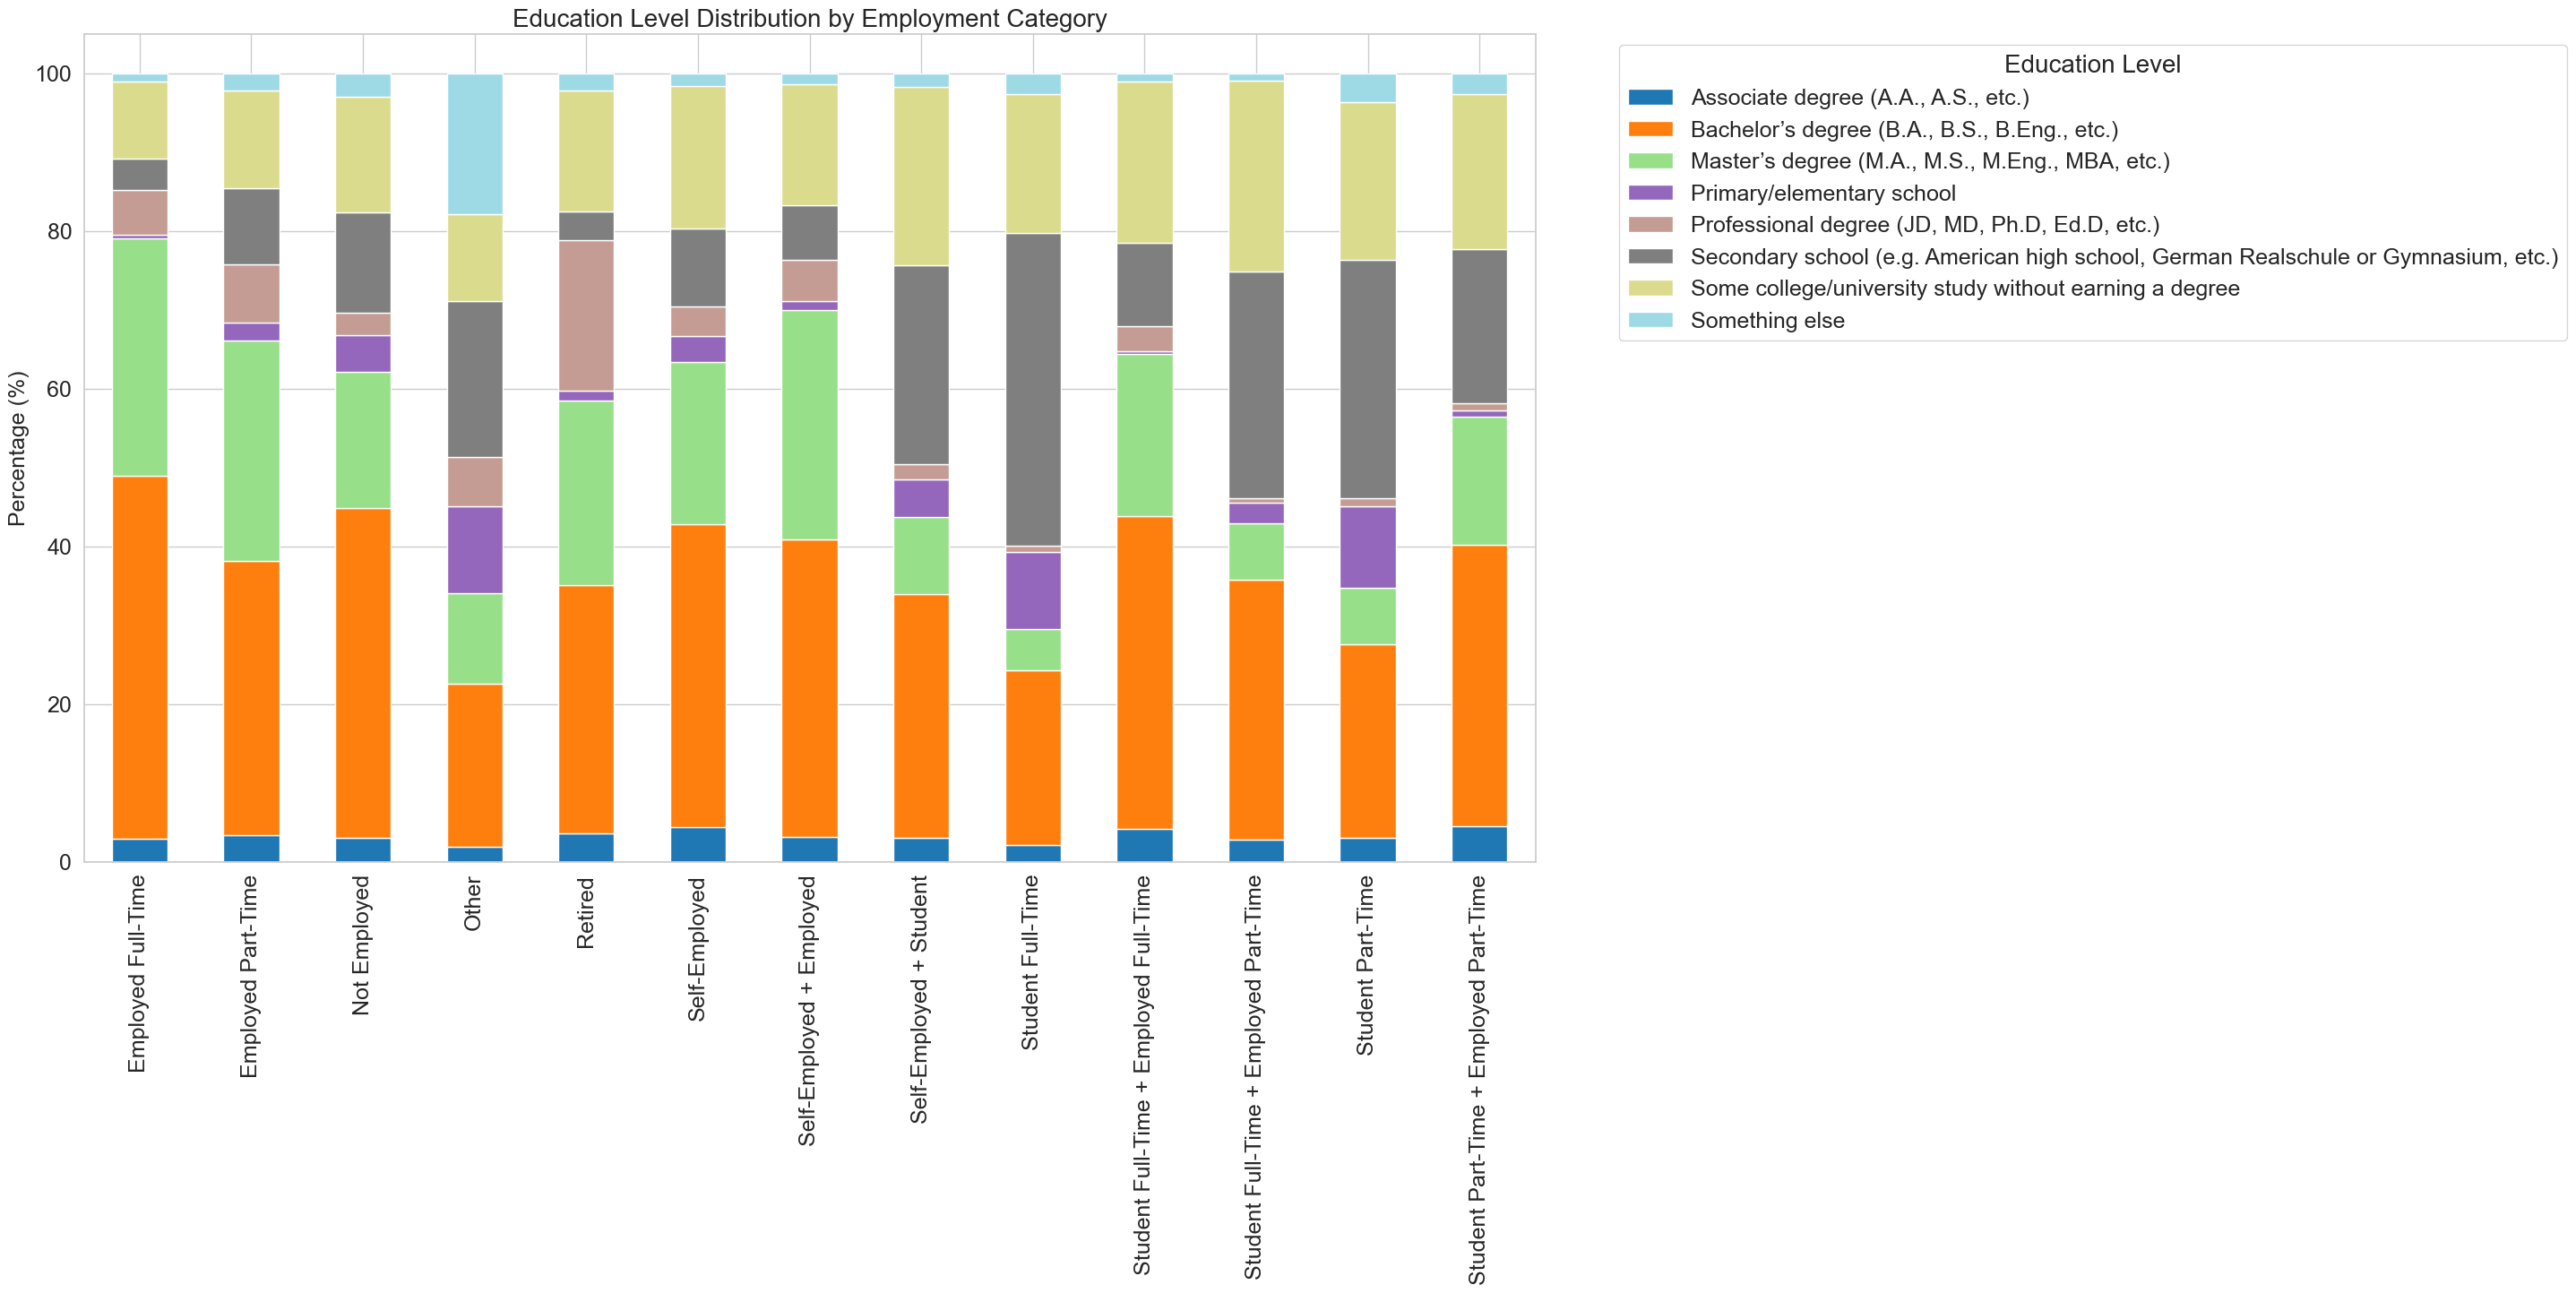

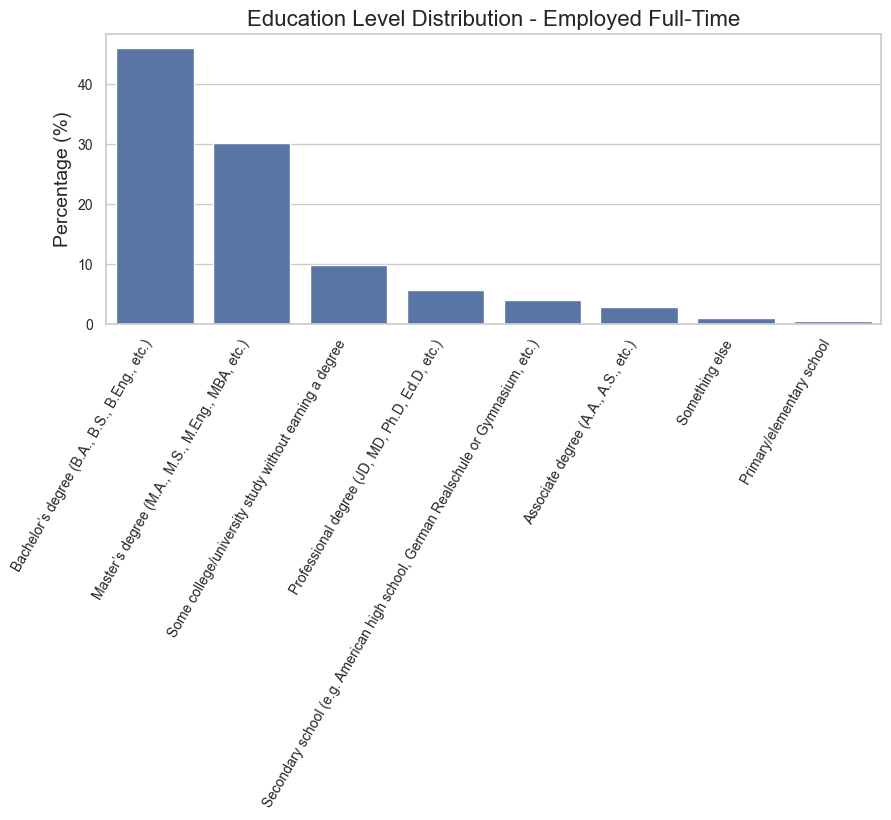

In [16]:
# --- 1) Education Level Distribution by Employment Category (stacked bar) ---
plt.figure(figsize=(12,6))
edu_employment_ct.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    figsize=(24,12)
)

plt.title('Education Level Distribution by Employment Category', fontsize=20)
plt.xlabel('', fontsize=18)
plt.ylabel('Percentage (%)', fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(
    title='Education Level',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=18,
    title_fontsize=20
)
plt.subplots_adjust(right=0.8)  # ensures legend fits inside the canvas
plt.show()


# --- 2) Education Level Distribution - Full-Time Employed ---
ft_employed = clean_df[clean_df['EmploymentCategory'] == 'Employed Full-Time']

# Count education levels (in percentages)
edu_counts = ft_employed['EdLevel'].value_counts(normalize=True) * 100
edu_df = edu_counts.reset_index()
edu_df.columns = ['EdLevel', 'Percentage']

plt.figure(figsize=(10,5))
sns.barplot(
    data=edu_df,
    x='EdLevel',
    y='Percentage',
    legend=False
)

plt.title("Education Level Distribution - Employed Full-Time", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(rotation=60, fontsize=10, ha='right')
plt.yticks(fontsize=10)

# Adjust layout so labels fit (instead of tight_layout warning)
plt.subplots_adjust(bottom=0.3)
plt.show()



### How Remote Work correlates to Employment:

📊 Remote Work Percentage by Employment Category (sorted):
RemoteWork                              Hybrid  In-person  Remote
EmploymentCategory                                               
Self-Employed                            22.44       6.10   71.46
Self-Employed + Employed                 32.23       8.19   59.59
Self-Employed + Student                  37.82      11.14   51.04
Not Employed                             27.91      27.91   44.19
Employed Full-Time                       44.25      21.88   33.86
Employed Part-Time                       45.60      26.02   28.38
Student Full-Time + Employed Full-Time   42.43      31.79   25.78
Student Full-Time + Employed Part-Time   46.24      32.01   21.75
Student Part-Time + Employed Part-Time   50.62      31.92   17.46


<Figure size 1800x600 with 0 Axes>

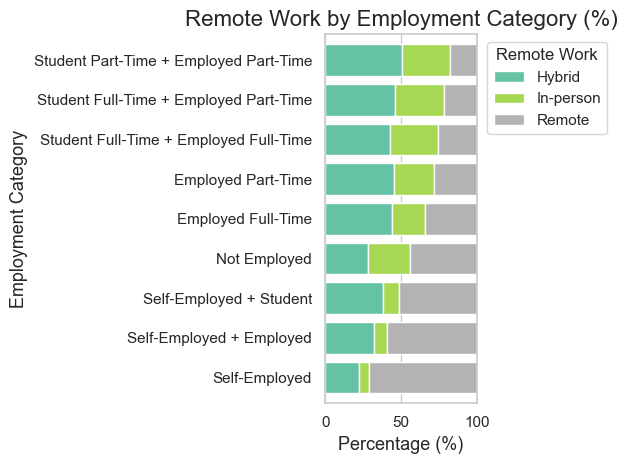

In [17]:
# Clean Hybrid label for consistency
df['RemoteWork'] = df['RemoteWork'].replace({
    'Hybrid (some remote, some in-person)': 'Hybrid'
})

# Crosstab normalized to show percentage per employment category
remote_by_emp = pd.crosstab(
    df['EmploymentCategory'],
    df['RemoteWork'],
    normalize='index'
) * 100

# --- Sort by descending percentage of Remote work ---
if 'Remote' in remote_by_emp.columns:
    remote_by_emp = remote_by_emp.sort_values(by='Remote', ascending=False)
else:
    print("⚠️ No 'Remote' column found. Sorting skipped.")

# --- Display the sorted table ---
print("📊 Remote Work Percentage by Employment Category (sorted):")
print(remote_by_emp.round(2))

# --- Plot: 100% stacked horizontal bar chart (sorted) ---
plt.figure(figsize=(18,6))
remote_by_emp.plot(
    kind='barh',
    stacked=True,
    colormap='Set2',
    width=0.8
)

plt.title('Remote Work by Employment Category (%)', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=13)
plt.ylabel('Employment Category', fontsize=13)
plt.legend(title='Remote Work', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# Part 2 is complete.
## 📊 Part 2 — Key Findings and Insights
1. Respondent Overview

The majority of respondents are European and work as Full-Time Employees. Approximately 17% of all respondents identify as students, either studying exclusively or combining their studies with employment.

2. Job Satisfaction and Professional Experience

The distributions of both Job Satisfaction and Years of Professional Coding Experience are right-skewed, indicating a higher concentration of respondents with good satisfaction levels but limited professional experience.

The Job Satisfaction scores are centered around a level of 8.

The Years of Professional Coding Experience are centered around 2.5 years.

Further analysis suggests that Job Satisfaction tends to increase slightly with experience, with a small dip observed after approximately 35–40 years of professional coding experience.

3. Education Level

Among full-time employees, more than 75% hold either a Bachelor’s or Master’s degree, and another 15% have some college credits or a professional degree.
This emphasizes a strong correlation between higher education and full-time employment within the dataset.

4. Remote Work and Employment Type

When analyzing Remote Work Status, self-employed respondents show the greatest flexibility to work remotely. This pattern suggests that large corporate environments still value or require some in-person collaboration to maintain team effectiveness and cohesion.

## 🧠 Summary

Overall, the data paints a picture of a well-educated, experienced, and predominantly North American and European workforce.
While most respondents are full-time employees, a smaller but meaningful portion are students or early-career professionals.
The gradual rise in job satisfaction with experience—paired with the continuing preference for hybrid or on-site models among larger organizations—offers valuable insight into the current dynamics of professional development and workplace flexibility in the tech industry.